In [1]:
import pandas as pd

df = pd.read_csv('../data/synergies.csv', skiprows=3, usecols=[1, 2, 8, 14, 27])
df = df.iloc[df.index[[i[:2] == 'EC' for i in df[df.columns[-1]]]]]
df = df[df.columns[0:4]]

comp = 'AZ-LolCDE B-01 Ceftriaxone Chloramphenicol Ciprofloxacin Clarithromycin Colistin DMSO Doxycycline Globomycin Levofloxacin Mecillinam Meropenem Nitrofurantoin Nitroxolin Norfloxacin PolymyxineB Trimethoprim'
comp = comp.split(' ')
correct = [(df.iloc[i, 0] in comp) and (df.iloc[i, 1] in comp) for i in range(len(df))]
df = df.iloc[df.index[correct]]
df.shape

(34, 4)

In [2]:
import numpy as np

top = 500
gct = pd.read_csv('../data/gsea_input/normalized.gct', sep='\t', skiprows=2)
gct.index = gct['NAME']
gct = gct[gct.columns[2:]]
gct.columns = 'AZ-LolCDE AZ-LolCDE AZ-LolCDE B-01 B-01 B-01 Ceftriaxone Ceftriaxone Ceftriaxone Chloramphenicol Chloramphenicol Chloramphenicol Ciprofloxacin Ciprofloxacin Ciprofloxacin Clarithromycin Clarithromycin Clarithromycin Colistin Colistin Colistin DMSO DMSO DMSO DMSO DMSO DMSO Doxycycline Doxycycline Doxycycline Globomycin Globomycin Globomycin Levofloxacin Levofloxacin Levofloxacin Mecillinam Mecillinam Mecillinam Meropenem Meropenem Meropenem Nitrofurantoin Nitrofurantoin Nitrofurantoin Nitroxolin Nitroxolin Nitroxolin Norfloxacin Norfloxacin Norfloxacin PolymyxineB PolymyxineB PolymyxineB Trimethoprim Trimethoprim Trimethoprim'.split(' ')
gct = gct.loc[np.argsort(np.var(gct, axis=1)) > len(gct) - top - 1]

means = pd.DataFrame(index=gct.index, columns=comp)
for i in means.columns:
    means[i] = np.mean(gct[i], axis=1)
means

,AZ-LolCDE,B-01,Ceftriaxone,Chloramphenicol,Ciprofloxacin,Clarithromycin,Colistin,DMSO,Doxycycline,Globomycin,Levofloxacin,Mecillinam,Meropenem,Nitrofurantoin,Nitroxolin,Norfloxacin,PolymyxineB,Trimethoprim
NAME,,,,,,,,,,,,,,,,,,
ynfE,834.648038,1089.828088,1102.514769,1355.906946,1469.544085,736.779577,1091.880938,1599.947470,1060.870691,1041.740605,1403.185243,1139.605104,1396.245829,324.562761,361.641420,913.318047,973.936422,1463.702172
yqhA,1426.221231,1454.361511,1322.196024,1522.917178,756.689564,2300.995510,1525.835252,1403.145299,1238.121550,1427.701497,1010.250161,1051.300529,1351.232753,971.315509,651.784708,989.764664,2193.799766,1072.078987
metU,3105.349257,2841.903839,3699.512219,4806.604369,3407.842338,4776.979013,2274.989500,3186.711354,3937.009429,2556.975415,3419.496879,3650.341811,2984.108356,1157.455213,448.462049,3858.587421,1406.264206,4120.582367
oppB,2933.401787,2142.946999,2367.982261,1931.654029,3177.878773,1929.387773,2358.800648,2687.032258,2852.237005,3195.589284,3625.946768,2614.184160,2850.339631,1080.754209,354.301925,3048.361810,2592.687000,3102.273703
rrlH,10477.766678,10079.233515,7176.749734,3515.233336,12154.990073,2480.557334,31088.011832,11619.153851,7045.569481,9951.677754,7061.162450,6046.499463,57006.942532,9832.642507,6927.353165,6732.043852,6713.738467,5056.484193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ompC,145070.578680,334861.391131,240598.396850,69394.355335,264054.042808,23981.779995,135452.785708,245286.787256,54350.453234,134800.460731,251285.526624,242084.093803,221407.585437,31852.894294,253525.343305,278033.104972,84913.737267,153001.904167
adhE,188706.243685,280614.359671,324705.804827,45171.289302,383860.976274,20802.151517,276900.164966,348082.019311,50083.260167,257347.231017,428981.599072,332446.952070,341984.164238,19568.074974,70214.198744,381607.604942,222850.345429,119435.689908
gapA,337537.461916,430666.026867,395613.930793,53765.660318,450170.559537,49434.816676,368718.499363,383805.949555,40177.253987,383453.213538,488400.090815,404979.477320,400896.884095,110327.206298,86244.546068,510918.366508,294590.011533,136218.419610


In [3]:
y = []
for i in df[df.columns[-2]]:
    if i == 'Synergy':
        y.append(0)
    elif i == 'Antagonism':
        y.append(1)
    else:
        y.append(2)

X = []
for i in range(len(df)):
    a = np.log2(means[df.iloc[i, 0]] / means['DMSO'])
    b = np.log2(means[df.iloc[i, 1]] / means['DMSO'])
    first = [a[i] > 0 and b[i] > 0 for i in range(len(a))]
    second = [a[i] < 0 and b[i] < 0 for i in range(len(a))] 
    third = [first[i] == False and second[i] == False for i in range(len(first))]
    X.append(first + second + third)
X = np.array(X)
X.shape

(34, 1500)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random
from IPython.display import clear_output

a = [0] * int(np.sum([i == 0 for i in y]) / 2)
b = [1] * int(np.sum([i == 1 for i in y]) / 2)
c = [2] * int(np.sum([i == 2 for i in y]) / 2)

guess = a + b + c

hist = []
trials = 500
for i in range(trials):
    current = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    reg = RandomForestClassifier().fit(X_train, y_train)
    
    correct = reg.predict(X_test) == y_test
    current.append(np.sum(correct) / len(correct))
    
    random.shuffle(guess)

    correct = np.array(guess) == y_test
    current.append(np.sum(correct) / len(correct))
    hist.append(current)
    
    print('%s / %s ' % (i + 1, trials)) 
    clear_output(wait=True)

hist = np.array(hist)

500 / 500 


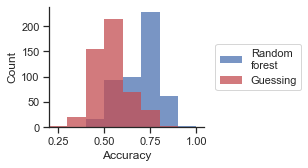

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', rc={'font.sans-serif':'Arial'})

plt.figure(figsize=(4.5, 2.5))
plt.hist(hist[:, 0], bins=np.arange(0.2, 1.1, 0.1), color='C0', alpha=0.75, linewidth=0, label='Random\nforest')
plt.hist(hist[:, 1], bins=np.arange(0.2, 1.1, 0.1), color='C3', alpha=0.75, linewidth=0, label='Guessing')
sns.despine()
plt.xlim(0.2, )
plt.ylabel('Count')
plt.xlabel('Accuracy')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', ncol=1)
plt.tight_layout()
plt.savefig('../figs/classifier1.png', dpi=300)
plt.show()

In [6]:
labels = [i + ' upregulated' for i in means.index]
labels += [i + ' downregulated' for i in means.index]
labels += [i + ' mixed' for i in means.index]

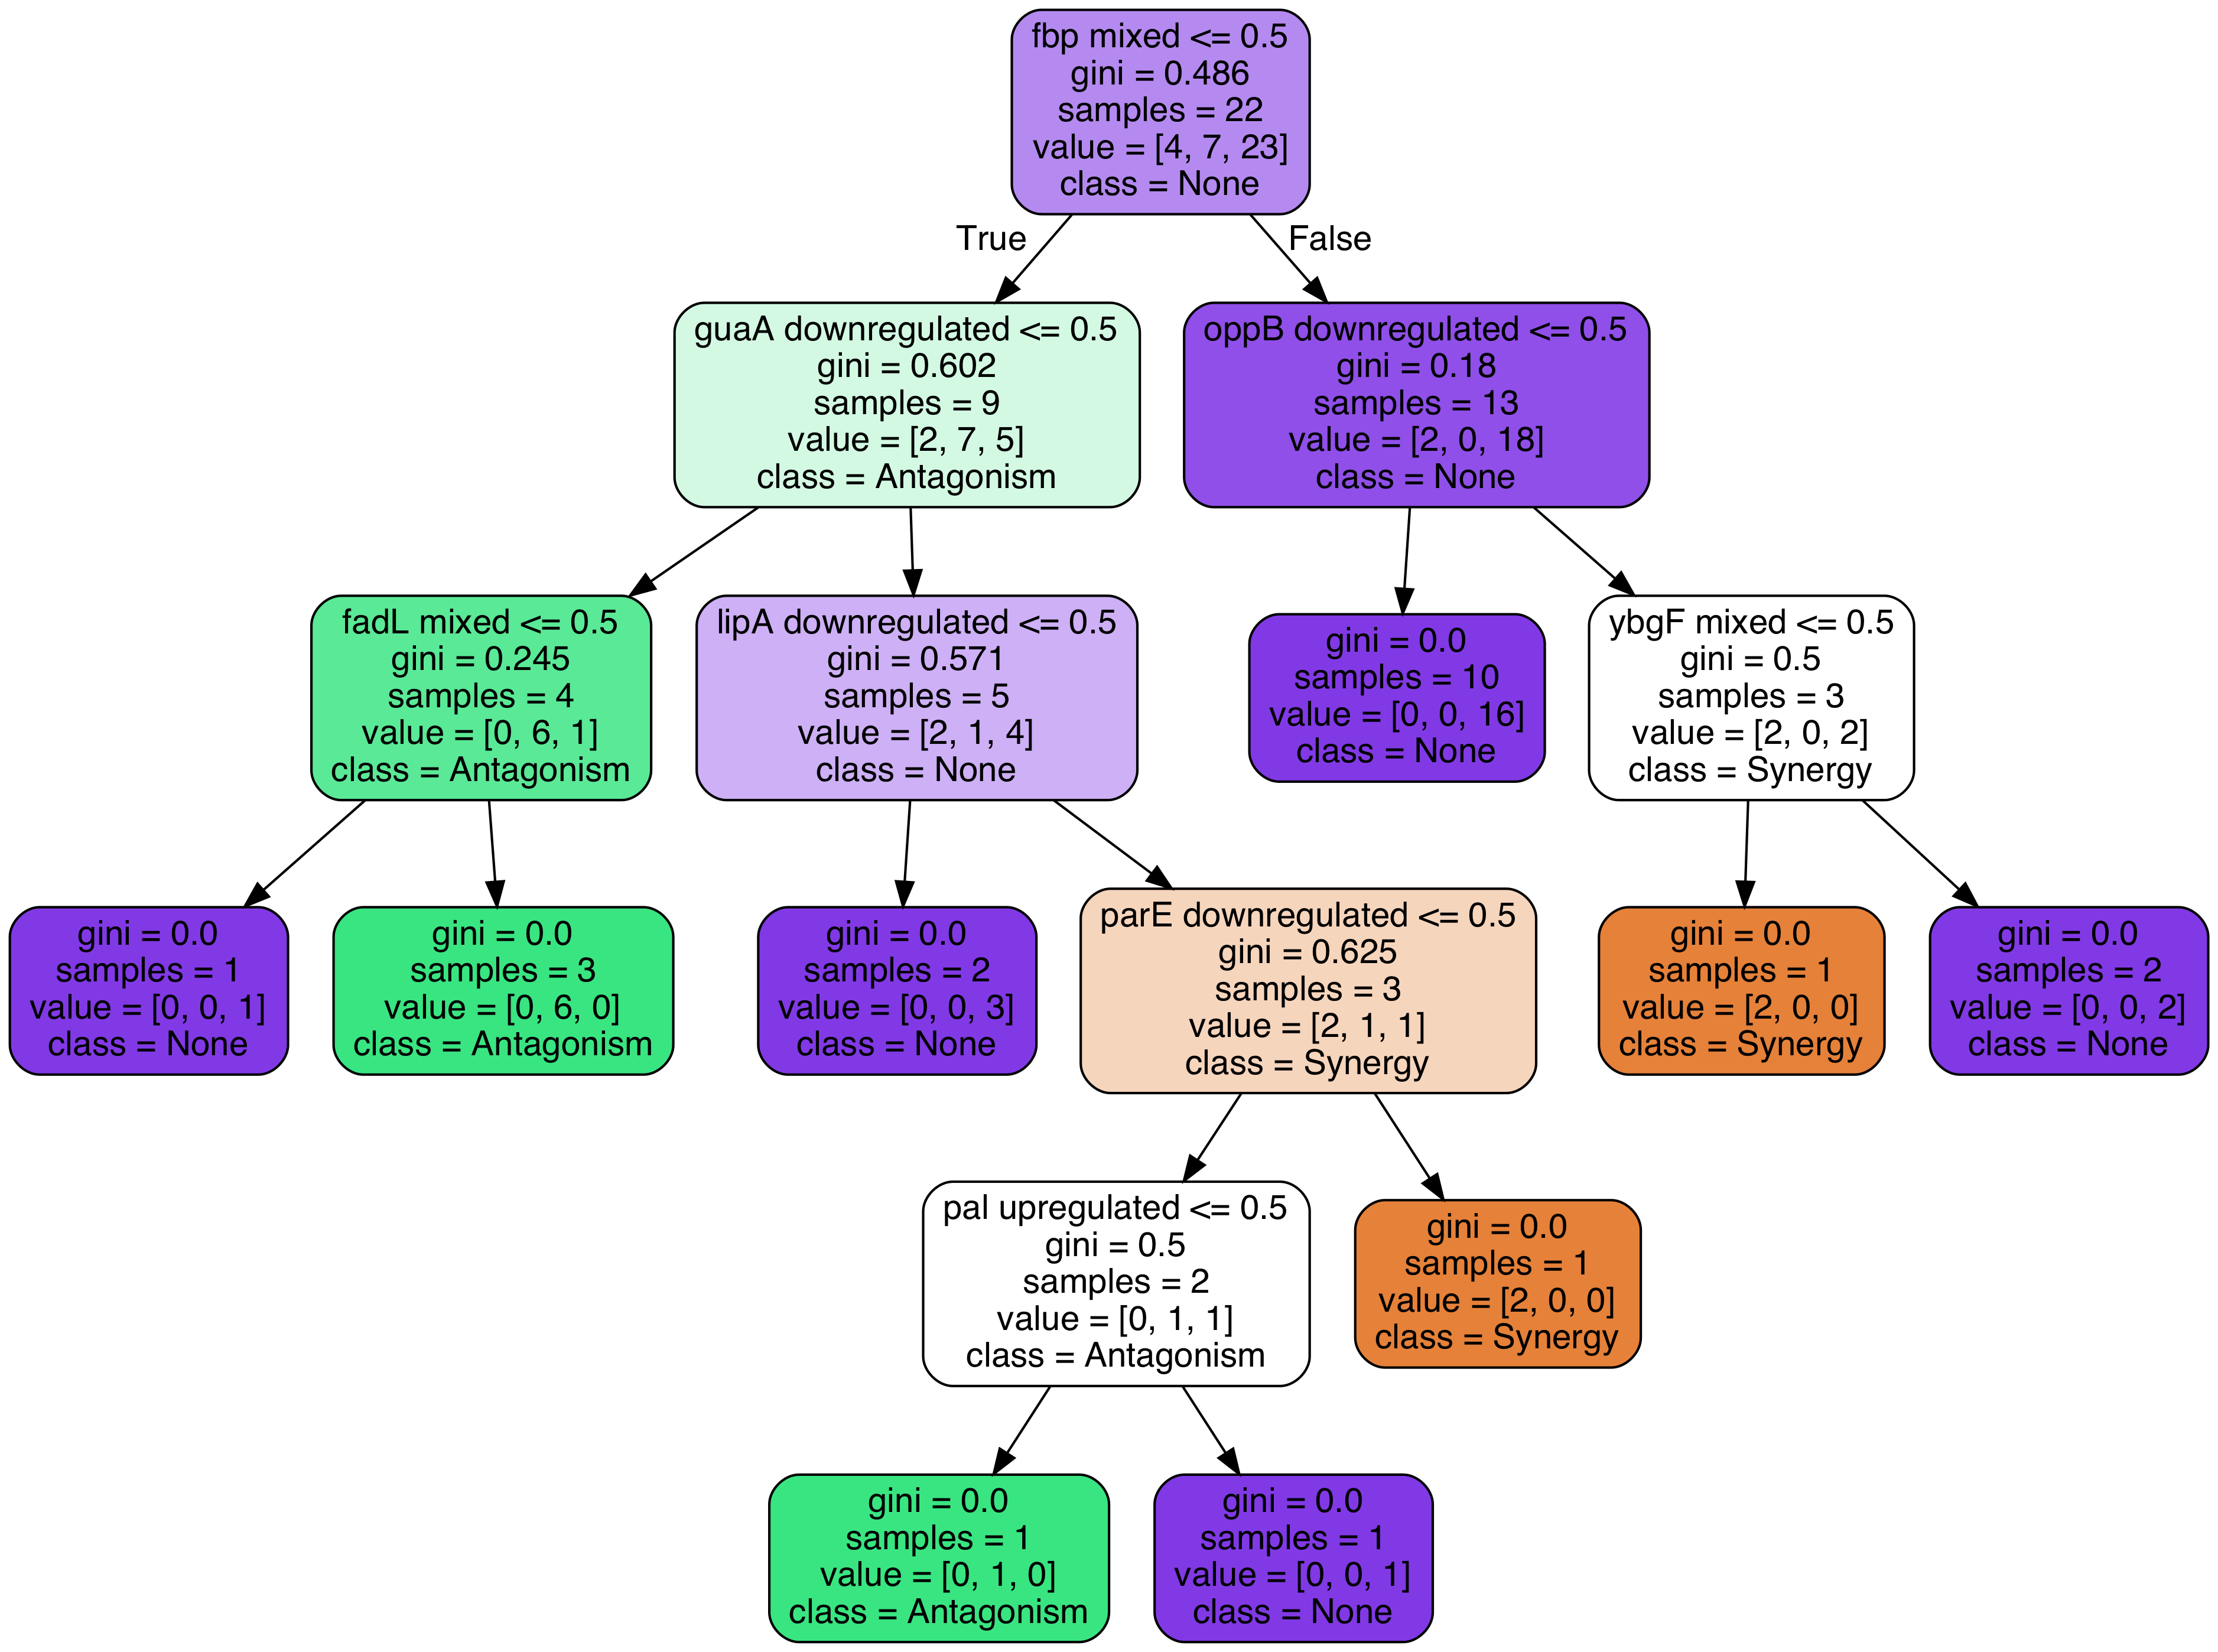

In [8]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

reg = RandomForestClassifier().fit(X, y)
    
estimator = reg.estimators_[0]

export_graphviz(estimator, out_file='../figs/classifier2.dot', feature_names=labels, class_names = ['Synergy', 'Antagonism', 'None'],
                rounded=True, filled=True)
call(['dot', '-Tpng', '../figs/classifier2.dot', '-o', '../figs/classifier2.png', '-Gdpi=300'])
Image(filename='../figs/classifier2.png', width=4000, height=3000)